In [1]:
import csv
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
df = pd.read_csv("../../data/data7size20.csv")
y = df['class']

In [2]:
img_list = []
size = 64
for i in range(len(df)):
    img_list.append(cv2.resize(cv2.imread("../../"+df.PATH[i]),(size,size)))
    
X_train, X_test, y_train, y_test = train_test_split(img_list, y, test_size=0.2,random_state=1)
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5,random_state=1)

In [3]:
from tensorflow.keras.utils import to_categorical
X_train,X_val,X_test = np.array(X_train)/255.,np.array(X_val)/255.,np.array(X_test)/255.
y_train,y_val,y_test =  to_categorical((np.array(y_train)),7),to_categorical((np.array(y_val)),7),to_categorical((np.array(y_test)),7)

In [4]:
from tensorflow.keras import layers,models,initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import sys
def model_build():
    size = 64
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(size, size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))
    #model.summary()
    return model

In [5]:
from tensorflow.python.keras.callbacks import TensorBoard
model = model_build()
model.compile(
   optimizer = 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

#tsb = TensorBoard(log_dir='./logs')
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(X_val,y_val))

Epoch 1/20
284/284 [==============================] - 15s 51ms/step - loss: 1.3090 - accuracy: 0.5134 - val_loss: 1.0084 - val_accuracy: 0.6470
Epoch 2/20
284/284 [==============================] - 14s 49ms/step - loss: 1.0218 - accuracy: 0.6399 - val_loss: 0.9754 - val_accuracy: 0.6565
Epoch 3/20
284/284 [==============================] - 15s 53ms/step - loss: 0.9764 - accuracy: 0.6543 - val_loss: 0.9410 - val_accuracy: 0.6669
Epoch 4/20
284/284 [==============================] - 15s 54ms/step - loss: 0.9481 - accuracy: 0.6587 - val_loss: 0.9137 - val_accuracy: 0.6724
Epoch 5/20
284/284 [==============================] - 15s 54ms/step - loss: 0.9259 - accuracy: 0.6639 - val_loss: 0.8988 - val_accuracy: 0.6757
Epoch 6/20
284/284 [==============================] - 15s 55ms/step - loss: 0.8965 - accuracy: 0.6720 - val_loss: 0.9103 - val_accuracy: 0.6675
Epoch 7/20
284/284 [==============================] - 16s 55ms/step - loss: 0.8655 - accuracy: 0.6848 - val_loss: 0.8851 - val_accuracy:

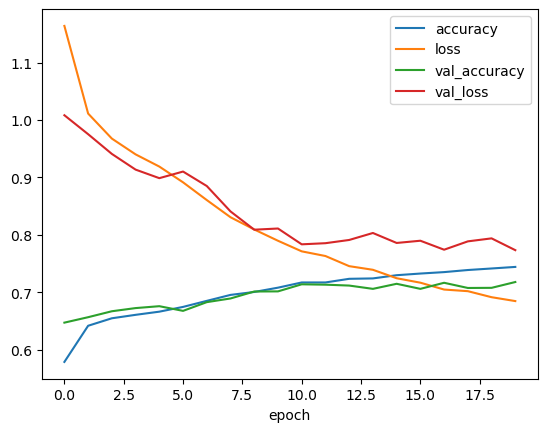

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.epoch, history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [7]:
score = model.evaluate(X_test, y_test, verbose=0,batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7744434475898743
Test accuracy: 0.7157662510871887
